In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/content/hotel_booking.csv')

In [4]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [5]:
data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [6]:
data.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


# Which hotel has higher cancelletion rate?

In [16]:
hotels ={}
for hotel in data["hotel"].value_counts().keys():
    h1 = data[data["hotel"]==hotel]
    hotels[hotel]=round(h1["is_canceled"].sum()/len(h1["is_canceled"])*100,2)

print(hotels)

{'City Hotel': 41.73, 'Resort Hotel': 27.76}




* City hotel has higher cancelletion rate (i.e. 41.73)

* Resort hotel  has less cancelletion rate (i.e. 27.76)









# Cancelletion according to year?(with graph)

{'City Hotel': {2016: 40.4, 2017: 42.5, 2015: 43.88}, 'Resort Hotel': {2016: 26.55, 2017: 30.76, 2015: 25.72}}


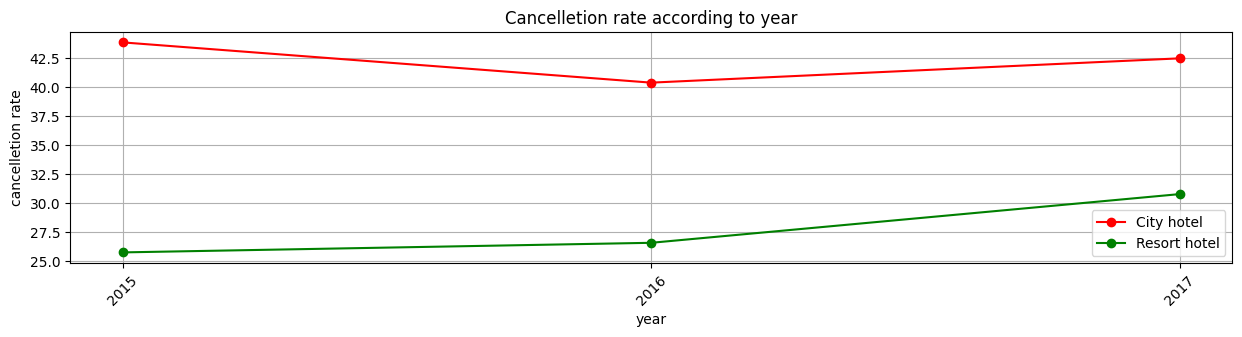

In [51]:
year={}
for i in data["hotel"].value_counts().keys():
    year[i]={}
    for j in data["arrival_date_year"].value_counts().keys():
        h1 = data[(data["hotel"]==i) & (data["arrival_date_year"]==j)]
        rate = round(h1["is_canceled"].mean()*100,2)
        year[i][j]= rate

print(year)

city = {2015: 43.88, 2016: 40.4, 2017: 42.5}
resort = {2015: 25.72 ,2016: 26.55, 2017: 30.76}
city_df = pd.Series(city)
resort_df =pd.Series(resort)

plt.figure(figsize=(15,3))

plt.plot(city_df.index,city_df.values,marker='o',label="City hotel",color ="red")
plt.plot(resort_df.index,resort_df.values, marker='o',label="Resort hotel",color ="green")

plt.title("Cancelletion rate according to year")
plt.xlabel("year")
plt.ylabel("cancelletion rate")
plt.grid()
plt.xticks([2015,2016,2017])
plt.xticks(rotation=45)
plt.legend()
plt.show()




*   In City hotel:
                   cancelletion rate was highest in 2015(i.e.43.88)
                   cancelletion rate lesser in 2016(i.e.40.4)
                   cancelletion rate is higher than 2016 in 2017(i.e.42.5)
*   In Resort hotel:
                     cancelletion rate was lesser in 2015(i.e.25.72)
                     cancelletion rate is more than 2015 in 2016(i.e.26.55)
                     cancelletion rate is highest in 2017(i.e.30.76)



# Cancelletion according to month?(with graph)

In [54]:
month={}
for i in data["hotel"].value_counts().keys():
    month[i]={}
    for j in data["arrival_date_month"].value_counts().keys():
        h1 = data[(data["hotel"]==i) & (data["arrival_date_month"]==j)]
        rate = round(h1["is_canceled"].mean()*100,2)
        month[i][j]= rate

print(month)


{'City Hotel': {'August': 40.1, 'July': 40.88, 'May': 44.38, 'October': 42.97, 'April': 46.32, 'June': 44.69, 'September': 42.03, 'March': 36.95, 'February': 38.29, 'November': 38.12, 'December': 42.11, 'January': 39.67}, 'Resort Hotel': {'August': 33.45, 'July': 31.4, 'May': 28.77, 'October': 27.51, 'April': 29.34, 'June': 33.07, 'September': 32.37, 'March': 22.87, 'February': 25.62, 'November': 18.92, 'December': 23.83, 'January': 14.82}}


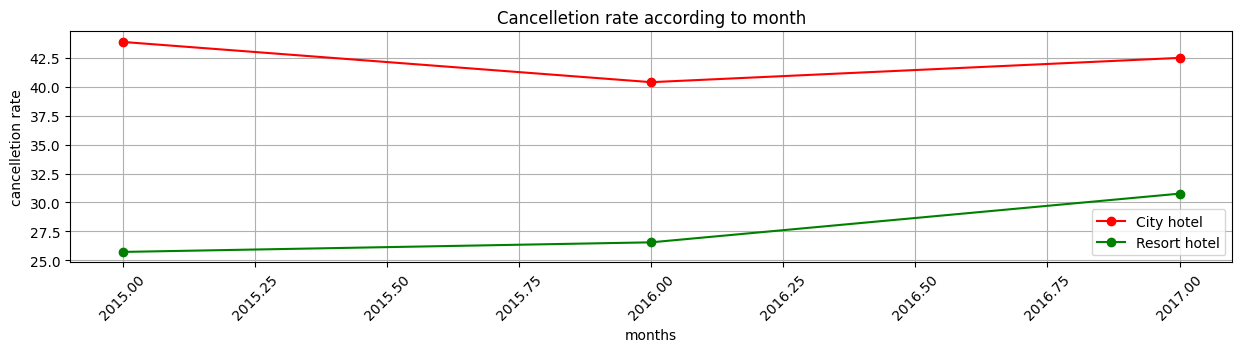

In [56]:
yearC = {'August': 40.1, 'July': 40.88, 'May': 44.38, 'October': 42.97, 'April': 46.32, 'June': 44.69, 'September': 42.03, 'March': 36.95, 'February': 38.29, 'November': 38.12, 'December': 42.11, 'January': 39.67},
yearR = {'August': 33.45, 'July': 31.4, 'May': 28.77, 'October': 27.51, 'April': 29.34, 'June': 33.07, 'September': 32.37, 'March': 22.87, 'February': 25.62, 'November': 18.92, 'December': 23.83, 'January': 14.82}
yearC_df = pd.Series(yearC)
yearR_df =pd.Series(yearR)

plt.figure(figsize=(15,3))

plt.plot(city_df.index,city_df.values,marker='o',label="City hotel",color ="red")
plt.plot(resort_df.index,resort_df.values, marker='o',label="Resort hotel",color ="green")

plt.title("Cancelletion rate according to month")
plt.xlabel("months")
plt.ylabel("cancelletion rate")
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.show()



*   In City hotel:
           In month of April there is heighest cancelation rate(i.e.46.32%)
           In month of March there is lowest cancelation rate(i.e.36.95%)

*   In Resort hotel:
             In month of August there is heighest cancelation rate(i.e.33.45%)
             In month of January there is lowest cancelation rate(i.e.14.82%)

# Which Hotel has more number of repeated guest?

In [60]:
guest ={}
for hotel in data["hotel"].value_counts().keys():
    h1 = data[data["hotel"]==hotel]
    guest[hotel]=round(h1["is_repeated_guest"].mean()*100,2)

print(guest)

{'City Hotel': 2.56, 'Resort Hotel': 4.44}


Resort hotel has more number of repeated guest than City hotel

# Which Hotel has more number of stays at weekend nights?

In [61]:
guest ={}
for hotel in data["hotel"].value_counts().keys():
    h1 = data[data["hotel"]==hotel]
    guest[hotel]=round(h1["stays_in_weekend_nights"].mean()*100,2)

print(guest)

{'City Hotel': 79.52, 'Resort Hotel': 118.98}


Resort Hotel has more number of stays at weekend nights

# Which Hotel has more number of stays at week nights?

In [62]:
guest ={}
for hotel in data["hotel"].value_counts().keys():
    h1 = data[data["hotel"]==hotel]
    guest[hotel]=round(h1["stays_in_week_nights"].mean()*100,2)

print(guest)

{'City Hotel': 218.3, 'Resort Hotel': 312.87}


Resort Hotel has more number of stays at week nights

# Values in Market segment column

In [70]:
data.value_counts("market_segment")

,count
market_segment,
Online TA,56477
Offline TA/TO,24219
Groups,19811
Direct,12606
Corporate,5295
Complementary,743
Aviation,237
Undefined,2


*   In market segment:
                      Online TA are 56477 values that are greatest
                      And the Undefined values are are only 2 that are lowest
                    

In [72]:
data.value_counts("reservation_status")

,count
reservation_status,
Check-Out,75166
Canceled,43017
No-Show,1207


In [73]:
data.value_counts("meal")

,count
meal,
BB,92310
HB,14463
SC,10650
Undefined,1169
FB,798
